## Gradient Descent 
The standard linear regression solver in `sklearn` uses a closed form solution to find the parameters (using matrix operations), see: http://mathworld.wolfram.com/Closed-FormSolution.html.  
However, `sklearn` aslo includes a (Stochastic) Gradient Descent implementation. 

In [1]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
weight_pd = pd.read_csv('weightV2.csv')
weight_pd.head()

,Weight,Waist
0,154.25,85.2
1,173.25,83.0
2,154.00,87.9
3,184.75,86.4
4,184.25,100.0


In [2]:
y = weight_pd.pop('Weight').values
X = weight_pd.values
X.shape

(251, 1)

It is important to scale data before using SGD

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  
X = scaler.transform(X)

In [4]:
iters =range(1,7) # We look at the first 6 iterations of the GD process

The strategy is to run SGD multiple times with 1, then 2 then 3 iterations etc.  
The warning messages are because the algorithm is not getting to converge.

In [5]:
slopes = [None]
intercepts = [None]
rsq = [None]

for i in iters:
    reg = SGDRegressor(max_iter=i).fit(X, y)
    slopes.append(reg.coef_[0])
    intercepts.append(reg.intercept_[0])
    rsq.append(reg.score(X, y))
    print(' R squared statistic: {:.2f}'.format(rsq[i]))
    print(' Slope: {:.2f}'.format(slopes[i]))
    print(' Intercept: {:.2f}'.format(intercepts[i]))

 R squared statistic: -7.46
 Slope: 14.67
 Intercept: 101.33
 R squared statistic: -1.88
 Slope: 17.68
 Intercept: 134.72
 R squared statistic: -0.20
 Slope: 20.04
 Intercept: 151.93
 R squared statistic: 0.38
 Slope: 21.77
 Intercept: 161.58
 R squared statistic: 0.60
 Slope: 22.15
 Intercept: 167.45
 R squared statistic: 0.69
 Slope: 22.73
 Intercept: 171.11


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceW

In [6]:
slopes

[None,
 14.666347434001468,
 17.679434801294743,
 20.03666731468223,
 21.774943115566316,
 22.153443959624084,
 22.73384541794005]

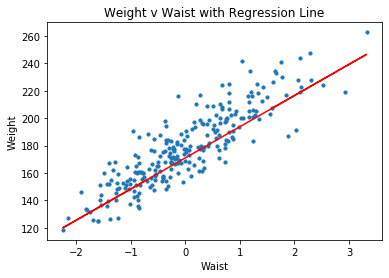

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
Y_pred = reg.predict(X)

plt.scatter(X, y, s = 10)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Waist')
plt.ylabel('Weight')
plt.title ('Weight v Waist with Regression Line' )
plt.show()

### Plot the progress of the SGD through the solution space
The model has two parameters (slope and intercept) so we have a 2D solution space.  
Ok, we are restarting the SGD multiple times so this is not a true SGD track.

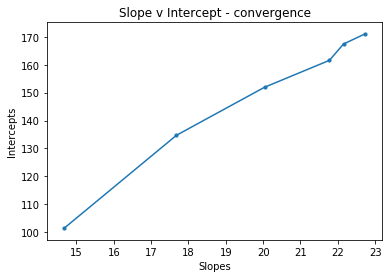

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(slopes, intercepts)
plt.scatter(slopes, intercepts, s = 10)
plt.xlabel('Slopes')
plt.ylabel('Intercepts')
plt.title ('Slope v Intercept - convergence' )
plt.show()

### Plot progress through the parameter space and the associated model

In [9]:
# A function to calculate two y values for two values of x - used in the plots.
def lin_reg(s,ic,x1,x2):
    y1 = ic + s * x1
    y2 = ic + s * x2
    return y1,y2

In [10]:
for step in iters:
    print(slopes[step],intercepts[step])

14.666347434001468 101.3260643420852
17.679434801294743 134.72006707721562
20.03666731468223 151.9300541404649
21.774943115566316 161.58269266648995
22.153443959624084 167.45324419674918
22.73384541794005 171.10715752930128


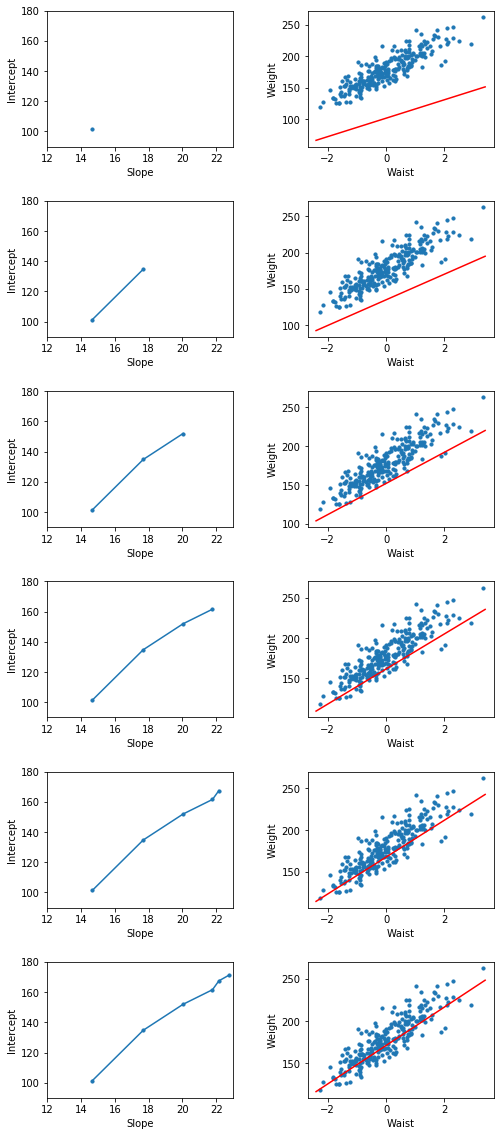

In [11]:
x_min = -2.4
x_max = 3.4
x_lims = [12,23]
y_lims = [90,180]

fig = plt.figure(figsize=(8,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for step in iters:
    i += 1
    ax1 = fig.add_subplot(len(iters), 2, i)
    ax1.plot(slopes[:step+1], intercepts[:step+1])
    ax1.scatter(slopes[:step+1], intercepts[:step+1], s = 10)
    ax1.set_xlabel('Slope')
    ax1.set_ylabel('Intercept')
    ax1.set_xlim(x_lims)
    ax1.set_ylim(y_lims)

    i += 1
    ax2 = fig.add_subplot(len(iters), 2, i)
    ax2.scatter(X, y, s = 10)
    ax2.set_xlabel('Waist')
    ax2.set_ylabel('Weight')
    y1,y2 = lin_reg(slopes[step],intercepts[step], x_min, x_max)
    ax2.plot([x_min, x_max], [y1,y2], color='red')

## Random Guessing

In [12]:
from random import uniform
x_min = -2.4
x_max = 3.4
x_lims = [12,23]
y_lims = [90,180]


In [13]:
slopes = [None]
intercepts = [None]

for i in iters:
    s = uniform(-x_lims[1],x_lims[1])
    intcp = uniform(y_lims[0],y_lims[1])
  
    slopes.append(s)
    intercepts.append(intcp)
    print(' Slope: {:.2f}'.format(slopes[i]))
    print(' Intercept: {:.2f}'.format(intercepts[i]))

 Slope: -7.50
 Intercept: 151.86
 Slope: -10.80
 Intercept: 160.74
 Slope: -11.23
 Intercept: 173.92
 Slope: -2.49
 Intercept: 168.06
 Slope: -6.39
 Intercept: 115.09
 Slope: -2.60
 Intercept: 110.79


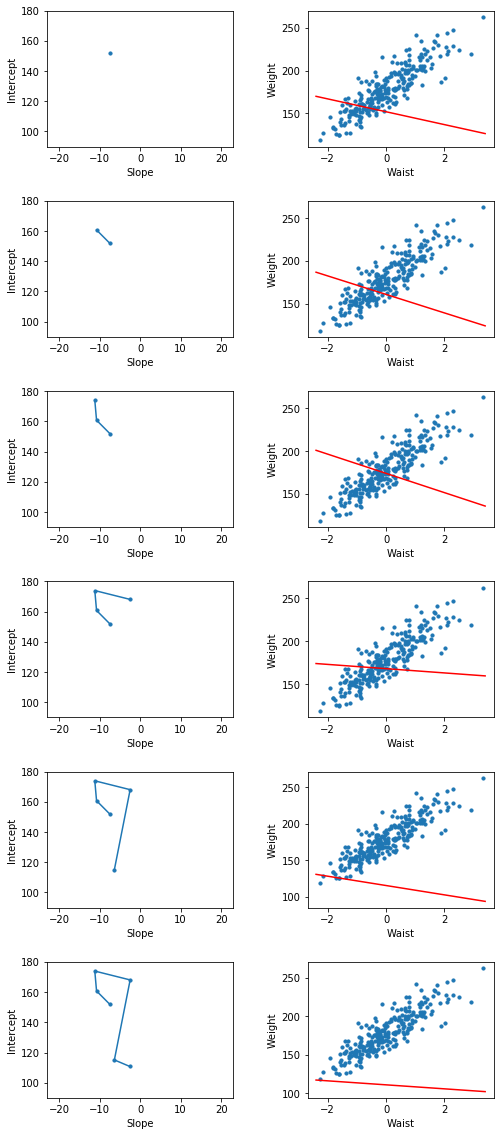

In [14]:
fig = plt.figure(figsize=(8,20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for step in iters:
    i += 1
    ax1 = fig.add_subplot(len(iters), 2, i)
    ax1.plot(slopes[:step+1], intercepts[:step+1])
    ax1.scatter(slopes[:step+1], intercepts[:step+1], s = 10)
    ax1.set_xlabel('Slope')
    ax1.set_ylabel('Intercept')
    ax1.set_xlim(-x_lims[1],x_lims[1])
    ax1.set_ylim(y_lims)

    i += 1
    ax2 = fig.add_subplot(len(iters), 2, i)
    ax2.scatter(X, y, s = 10)
    ax2.set_xlabel('Waist')
    ax2.set_ylabel('Weight')
    y1,y2 = lin_reg(slopes[step],intercepts[step], x_min, x_max)
    ax2.plot([x_min, x_max], [y1,y2], color='red')